In [24]:
#imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel_h, sobel_v, sobel
from skimage.filters import prewitt_h, prewitt_v, prewitt

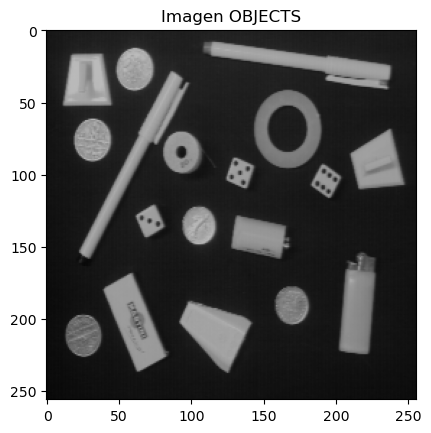

In [5]:
#Carga de imagen 
objects = cv2.imread('images/OBJECTS.png', cv2.IMREAD_GRAYSCALE)
#Visualizar la imagen
plt.imshow(objects, cmap='gray', vmin=0, vmax=255)
plt.title('Imagen OBJECTS')
plt.show()

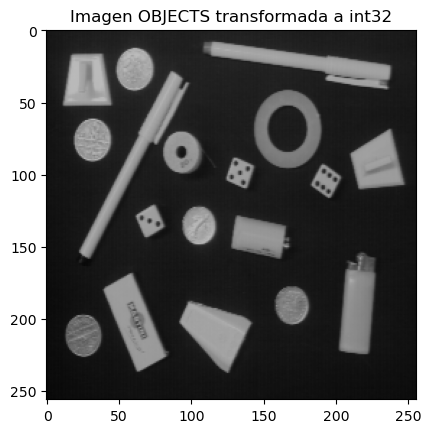

In [6]:
#transformacion a int32
objects_int32 = objects.astype(np.int32)
#visualizar la imagen transformada
plt.imshow(objects_int32, cmap='gray', vmin=0, vmax=255)
plt.title('Imagen OBJECTS transformada a int32')
plt.show()

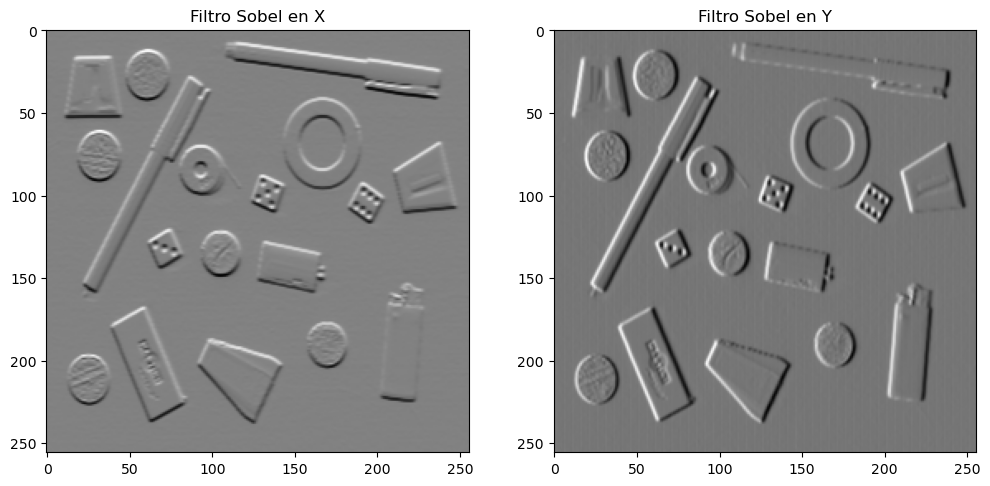

In [12]:
#Aplicacion de filtro sobel en x
img_sh = sobel_h(objects_int32)
#Aplicacion de filtro sobel en y
img_sv = sobel_v(objects_int32)
#Visualizar la imagen filtrada
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_sh, cmap='gray')
ax[0].set_title('Filtro Sobel en X')
ax[1].imshow(img_sv, cmap='gray')
ax[1].set_title('Filtro Sobel en Y')
plt.show()

**Descripción de sobel en x**

Al realizar el filtro sobel aplicado al eje x, el cual tiene como matriz asociada:

$$ g_{x} = \begin{bmatrix} -1 & -2 & -1 \\\\ 0 & 0 & 0 \\\\ 1 & 2 & 1 \end{bmatrix} $$

La imagen resultante se observa mayormente en un tono gris claro uniforme, lo que indica poca variación de intensidad en la dirección evaluada, sin embargo, los bordes horizontales de los objetos se resaltan al presentar transiciones bruscas entre el fondo y las figuras, generando valores altos de gradiente que permiten identificar con mayor claridad sus contornos.

**Descripción de sobel en y**

Al realizar el filtro sobel aplicado al eje y, el cual tiene como matriz asociada:

$$ g_{y} = \begin{bmatrix} -1 & 0 & 1 \\\\ -2 & 0 & 2 \\\\ -1 & 0 & 1 \end{bmatrix} $$

De igual forma que con el Sobel horizontal, el fondo se mantiene en tonos grises relativamente uniformes debido a la baja variación de intensidad en esa dirección; sin embargo, en este caso se resaltan principalmente los bordes verticales de los objetos, ya que el operador detecta cambios de intensidad de izquierda a derecha, generando valores altos de gradiente en los contornos laterales y permitiendo identificar con mayor claridad sus límites verticales.

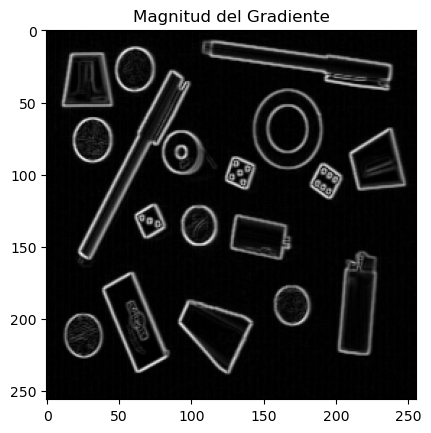

In [21]:
#Calculo de la magnitud del gradiente
objects_gradiente = np.absolute(img_sh) + np.absolute(img_sv)
#Visualizar la magnitud del gradiente
plt.imshow(objects_gradiente, cmap='gray')
plt.title('Magnitud del Gradiente')
plt.show()

**Descripción Magnitud del gradiente**

La magnitud del gradiente esta dada la formula:

$$ || \nabla f || \approx |g_{x}| + |g_{y}| $$

Al hacer la suma de los valores absolutos de las anteriores aplicaciones se observa que el fondo queda prácticamente negro, ya que en esas regiones no existen variaciones significativas de intensidad y, por lo tanto, la magnitud del gradiente es cercana a cero. En contraste, los contornos de los objetos aparecen claramente resaltados en tonos blancos, debido a que la combinación de ambas componentes del gradiente permite detectar cambios de intensidad en cualquier dirección, obteniendo así una representación completa y más precisa de los bordes presentes en la imagen.

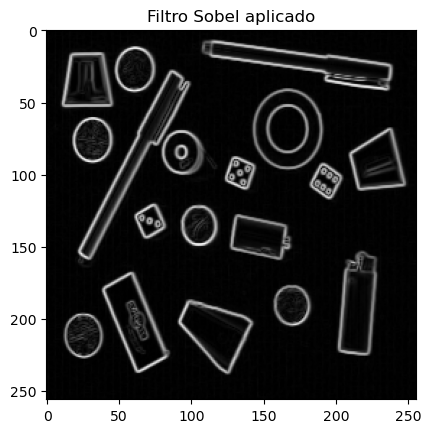

In [22]:
sobelAplicado = sobel(objects_int32)
#Visualizar la imagen filtrada con sobel
plt.imshow(sobelAplicado, cmap='gray')
plt.title('Filtro Sobel aplicado')
plt.show()

**Filtro Aplicado Por Libreria vs Filtro Suma Valores Absolutos**

En ambas imagenes se logra observar los bordes de los diferentes objetos de forma exitosa. Pese a que el filtro aplicado se puede llegar a observar un poco mejor en la definicion de bordes internos de los objetos nuestra aproximación es lo suficientemente buena para que esta mejorqa por parte del algoritmo de la libreria sea minima.

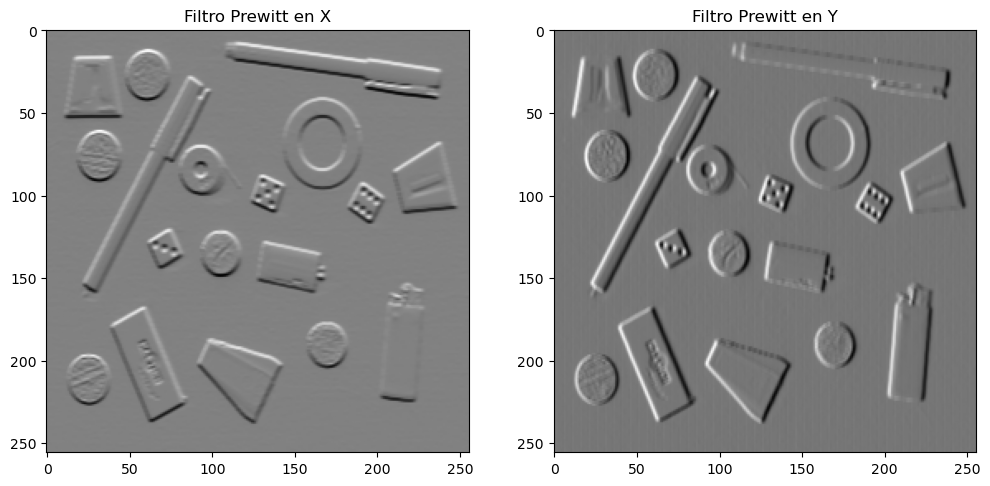

In [25]:
#Aplicacion de filtro prewitt en x
img_sh = prewitt_h(objects_int32)
#Aplicacion de filtro prewitt en y
img_sv = prewitt_v(objects_int32)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_sh, cmap='gray')
ax[0].set_title('Filtro Prewitt en X')
ax[1].imshow(img_sv, cmap='gray')
ax[1].set_title('Filtro Prewitt en Y')
plt.show()



**Descripción de prewitt en x**

$$ g_{x} = \begin{bmatrix} -1 & -1 & -1 \\\\ 0 & 0 & 0 \\\\ 1 & 1 & 1 \end{bmatrix} $$

**Descripción de prewitt en y**

$$ g_{y} = \begin{bmatrix} -1 & 0 & 1 \\\\ -1 & 0 & 1 \\\\ -1 & 0 & 1 \end{bmatrix} $$


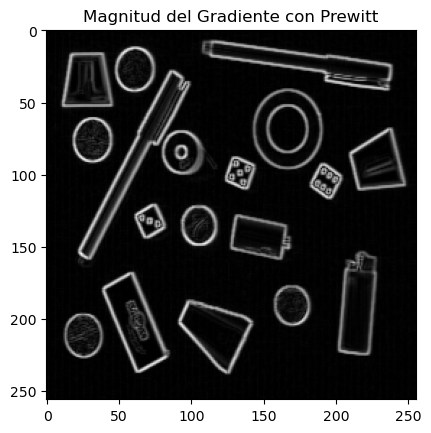

In [26]:
objects_gradiente_prewitt = np.absolute(img_sh) + np.absolute(img_sv)
plt.imshow(objects_gradiente_prewitt, cmap='gray')
plt.title('Magnitud del Gradiente con Prewitt')
plt.show()

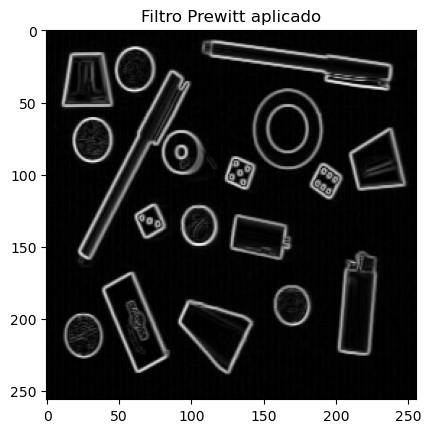

In [27]:
#Calcula bordes usando el filtro de sobel
img_s = prewitt(objects_int32)
#Visualizar la imagen filtrada con prewitt
plt.imshow(img_s, cmap='gray')
plt.title('Filtro Prewitt aplicado')
plt.show()